In [100]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

# Import LISC code
from lisc import Counts
from lisc.utils import save_object, load_object
from lisc.plts.counts import plot_matrix
from lisc.plts.utils import get_cmap


# Count articles of aperiodic in brain vs sleep

In [241]:
# Initialize counts object
counts = Counts()

# Settings for literature collection
db = 'pubmed'

In [257]:
terms_a = [['brain', 'cortex'],['sleep', 'nap']]  
terms_b = [['EEG slope', 'EEG exponent']]
# Set terms lists, indicating they are separate lists with the 'A' and 'B' labels
counts.add_terms(terms_a, dim='A')
counts.add_terms(terms_b, dim='B')
inclusions = ['EEG','MEG','iEEG','electroencephalography', 'magnetoencephalography', 'intracranial electroencephalography', 'intracranial EEG']
# Collect co-occurrence data
counts.run_collection()

Unloading terms.
Unloading terms.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [258]:
counts.counts.T

array([[3817,  815]])

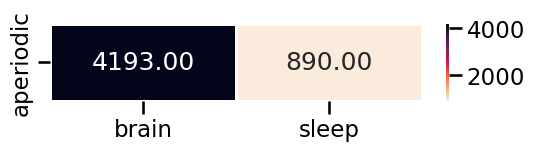

In [256]:
# Now the arrays are ready for plotting 
import pandas as pd
import seaborn
data_s = pd.DataFrame(counts.counts.T,columns=['brain','sleep'], index=['aperiodic'])
plt.figure(figsize=(6, 1))  
seaborn.heatmap(data_s,  annot=True, cmap='rocket_r', fmt='.2f', linewidths=1)

#plt.savefig('/home/b1044271/Columbia/Plots/NOV23/Literature_brain_sleep.svg')

# Different frequency bands

In [ ]:
# Initialize counts object
counts = Counts()

In [289]:
# Set up a list of multiple terms, each with synonyms
terms_a = [['1 - 45 Hz', '1 to 45 Hz'], ['1 - 30 Hz', '1 to 30 Hz'],['30 - 45 Hz', '30 to 45 Hz'],['30 - 50 Hz', '3 to 50 Hz'], ['1 - 10 Hz', '1 to 10 Hz']] 
terms_b = [['EEG spectral slope', 'iEEG spectral slope', 'EEG spectral exponent', 'iEEG spectral exponent']]

# NEW

In [ ]:
start_decade, end_decade = 1990, 2022
decades = list(range(start_decade, end_decade, 10))
    
# Define a list of modalities of interest, with synonyms
modality_terms = [['Motor Learning'], ['Motor Adaptation', 'Motor adaptive', 'Visuomotor adaptation']]

# Define a list of labels to use for the method terms
modality_labels = [lst[0] for lst in modality_terms]

In [466]:
start_year, end_year = 2009, 2023
years = list(range(start_year, end_year, 2))


year_counts=np.zeros([2,100])*np.nan

# Initialize counts object
counts = Counts()
terms_a = [['brain'], ['sleep']]  
terms_b = [['aperiodic exponent', 'spectral slope', 'spectral exponent', 'spectral parameterization', 'specparam', 'fooof', 'irasa', '1/f', '1/f-like', 'one-over f', 'aperiodic']]
inclusions = [['EEG','MEG','iEEG','electroencephalography', 'magnetoencephalography', 'intracranial electroencephalography', 'intracranial EEG'],['EEG','MEG','iEEG','electroencephalography', 'magnetoencephalography', 'intracranial electroencephalography', 'intracranial EEG']]
labels = ['brain', 'sleep']

# Set terms lists, indicating they are separate lists with the 'A' and 'B' labels
counts.add_terms(terms_a, dim='A')
counts.add_terms(terms_b, dim='B')
counts.add_terms(inclusions,  term_type='inclusions', dim='A')

# Collect co-occurrence data
i=0
for start_year in years:
    counts.run_collection( mindate=str(start_year) + '/01/01', maxdate=str(start_year+2 ) + '/12/31')
    year_counts[0:2,i] = np.squeeze(counts.counts)
    i=i+1


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


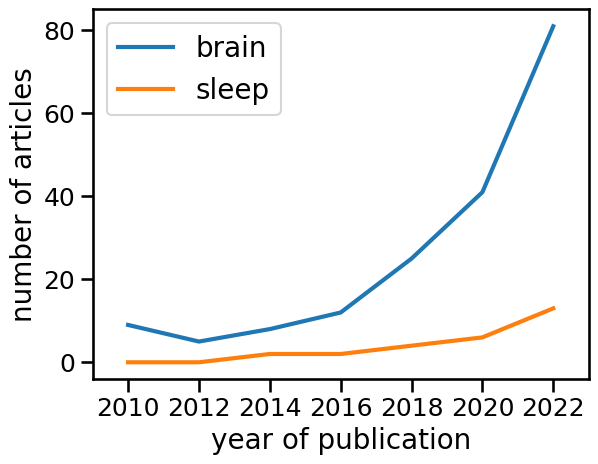

In [468]:
labels = ['brain', 'sleep']
years1 = np.array(years)+1

# Plot the popularity of each modality across the decades
plt.plot(years1, year_counts[0,0:7], label = 'brain', linewidth =3)
plt.plot(years1, year_counts[1,0:7], label = 'sleep', linewidth =3)
plt.legend(fontsize=20)
plt.xlim(2009,2023)
plt.xlabel('year of publication', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('number of articles', fontsize=20)
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/Literature_year.svg", dpi = 600)

# Get the articles

In [477]:
# Import the Words object, which is used for words collection
from lisc import Words

terms_a = [['brain'], ['sleep']]  
terms_b = [['spectral slope','spectral exponent', '1/f exponent', '1/f slope','aperiodic slope', 'aperiodic exponent', 'power-law exponent']]
inclusions = [['EEG','MEG','iEEG','electroencephalography', 'magnetoencephalography', 'intracranial electroencephalography', 'intracranial EEG']]

inclusions2 =[['sleep']]

# Initialize Words object and set the terms to search for
words = Words()
# Set terms lists, indicating they are separate lists with the 'A' and 'B' labels
words.add_terms(terms_b)
words.add_terms(inclusions2,  term_type='inclusions')

In [481]:
# Collect words data
words.run_collection(retmax=5)
words

In [482]:
words.__dict__

{'terms': [['spectral slope',
   'spectral exponent',
   '1/f exponent',
   '1/f slope',
   'aperiodic slope',
   'aperiodic exponent',
   'power-law exponent']],
 'inclusions': [['sleep']],
 'exclusions': [[]],
 '_labels': [None],
 'results': [<lisc.data.articles.Articles at 0x7f62f244d1b0>],
 'combined_results': [],
 'meta_data': {'date': '2023-11-22_17:09:38', 'requester': {'n_requests': 3, 'wait_time': 0.3333333333333333, 'start_time': '17:09:38 Wednesday 22 November 2023', 'end_time': '17:09:41 Wednesday 22 November 2023', 'logging': None}, 'db_info': {'dbname': 'pubmed', 'menuname': 'PubMed', 'description': 'PubMed bibliographic record', 'dbbuild': 'Build-2023.11.21.22.40', 'count': '36478017', 'lastupdate': '2023/11/21 22:40'}, 'log': None}}